# Install and Import Required Libraries

In [7]:
# Install any missing libraries (Run in Jupyter Notebook)
!pip install pandas numpy scikit-learn matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the Dataset

In [8]:
import requests

# URL of the dataset
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Download and save the dataset
response = requests.get(dataset_url)

# Save the content to a local file
with open("breast_cancer_wisconsin.csv", "wb") as file:
    file.write(response.content)

print("Dataset downloaded successfully!")


Dataset downloaded successfully!


In [9]:
# Define column names based on the dataset description
columns = ['ID', 'Diagnosis', 'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean',
           'Smoothness_mean', 'Compactness_mean', 'Concavity_mean', 'Concave_points_mean',
           'Symmetry_mean', 'Fractal_dimension_mean', 'Radius_se', 'Texture_se', 'Perimeter_se',
           'Area_se', 'Smoothness_se', 'Compactness_se', 'Concavity_se', 'Concave_points_se',
           'Symmetry_se', 'Fractal_dimension_se', 'Radius_worst', 'Texture_worst', 'Perimeter_worst',
           'Area_worst', 'Smoothness_worst', 'Compactness_worst', 'Concavity_worst', 'Concave_points_worst',
           'Symmetry_worst', 'Fractal_dimension_worst']

In [10]:
df = pd.read_csv(dataset_url, names=columns)

In [11]:
df.head()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Preprocessing

**Drop Unnecessary Columns**

In [12]:
# Drop 'ID' column as it's not useful for prediction
df.drop(columns=['ID'], inplace=True)


**Convert Categorical Labels into Numerical Values**

In [13]:
# Convert 'Diagnosis' (B = Benign, M = Malignant) to binary (0 and 1)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
df.head()


,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Check for Missing Values**

In [14]:
# Check for missing values
df.isnull().sum()


Diagnosis                  0
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64

# Exploratory Data Analysis (EDA)

In [15]:
# Summary statistics
df.describe()


,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Visualizing Class Distribution**

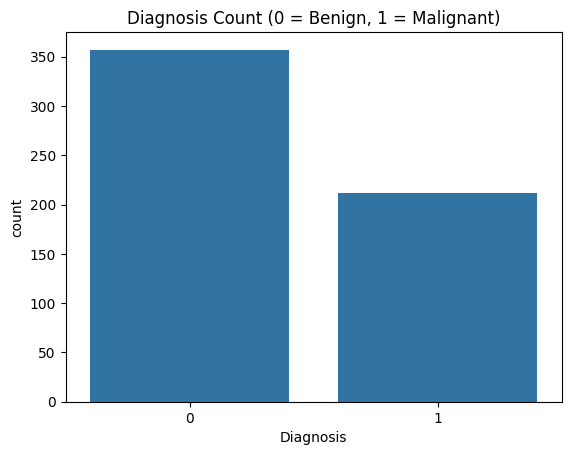

In [16]:
# Count plot for diagnosis
sns.countplot(x=df['Diagnosis'])
plt.title("Diagnosis Count (0 = Benign, 1 = Malignant)")
plt.show()


**Feature Correlation with Diagnosis**

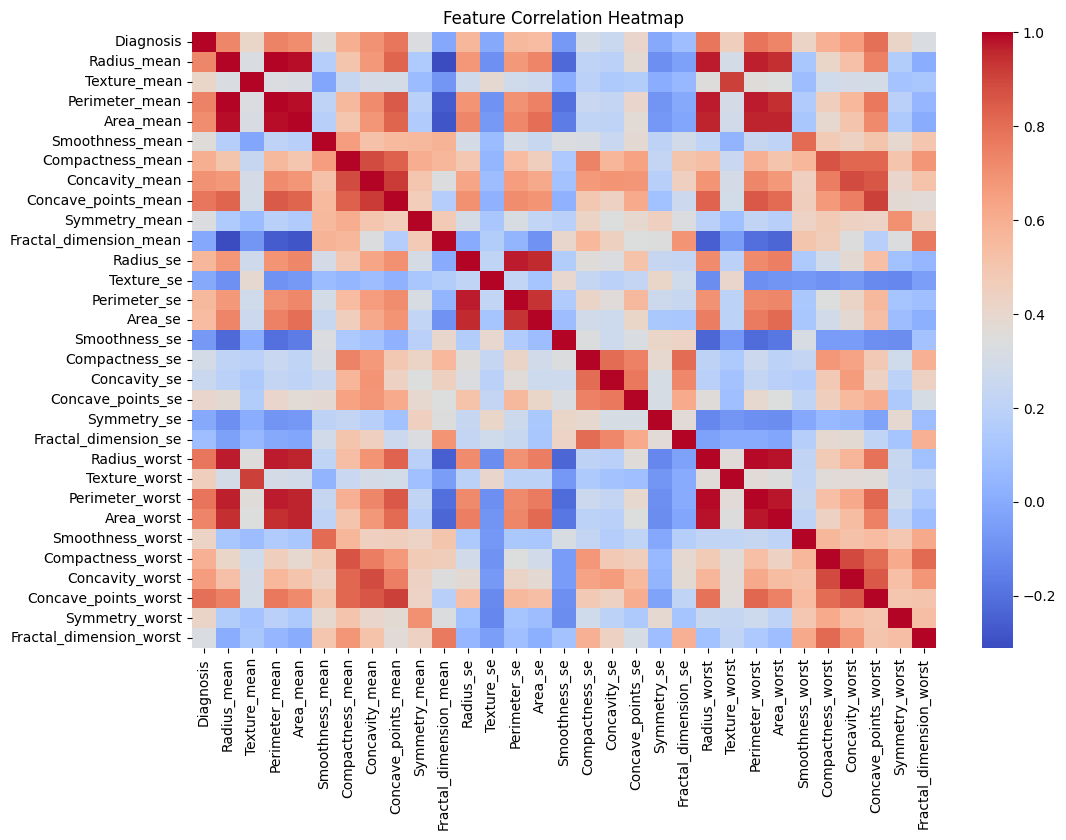

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


# Train-Test Split

In [18]:
# Define independent variables (X) and target variable (y)
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (455, 30), Testing set: (114, 30)


# Feature Scaling (Standardization)

In [19]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, transform test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train a Machine Learning Model

**Using Random Forest Classifier for classification.**

In [20]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Model Evaluation

In [21]:
# Make predictions
y_pred = model.predict(X_test)


In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.96


**Confusion Matrix**

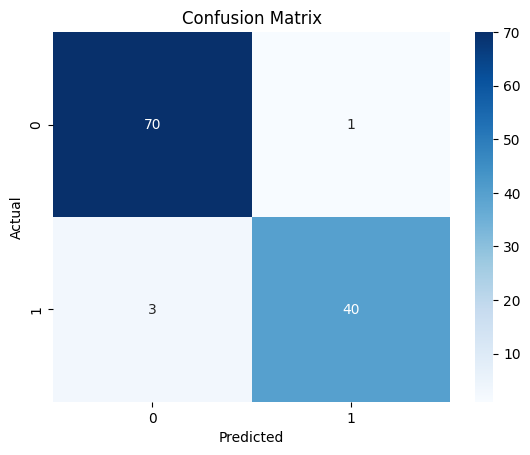

In [23]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
# Detailed classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

